# 1 - Exploratory Data Analysis 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity='all'
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix 

In [3]:
# Load Data
df = pd.read_excel('Credit Card Customer Data.xlsx')
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [4]:
# we drop the first and secoond column (customer keys)
df=df.drop(columns=['Sl_No','Customer Key'])

In [5]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [6]:
#print the shape of the dataset
df.shape

(660, 5)

In [7]:
#assess the info and type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


All variables are nuemrical (integers)

In [8]:
# Checking null values or incorrect imputation
df.isnull().values.any()
df.isnull().sum()
df.isna().values.any()
df.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

There is no obvious null values or missing values

In [9]:
#Print the descriptive statistics for numerical columns 
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


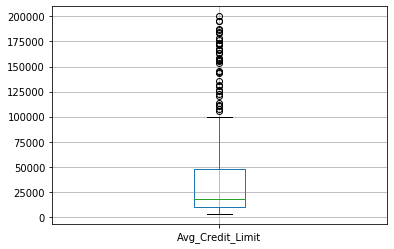

In [10]:
# Let's check for outliers 
df.boxplot(['Avg_Credit_Limit'])

We can see outliers for Avg_Credit_Limit 

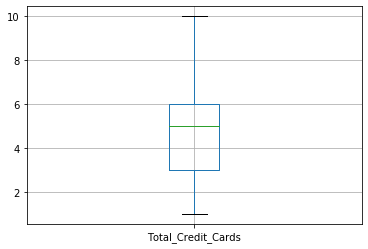

In [11]:
df.boxplot(['Total_Credit_Cards'])

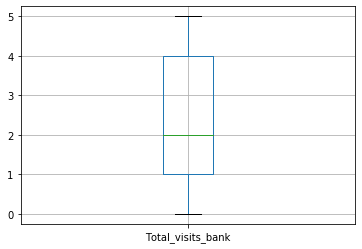

In [12]:
df.boxplot(['Total_visits_bank'])

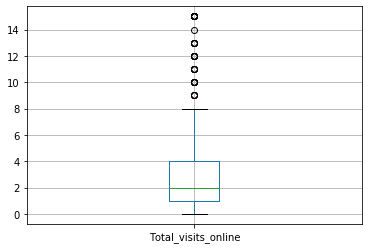

In [13]:
df.boxplot(['Total_visits_online'])

We can observe outliers for Total_visits_online

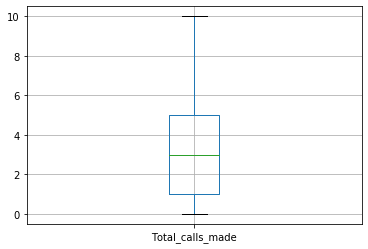

In [14]:
df.boxplot(['Total_calls_made'])

In [15]:
#removing outliers for Total_visits_online
#calculating IQR
IQR=df.quantile(q=0.75)-df.quantile(q=0.25)
#Defining treshold for outliers
outliers_high=df.quantile(q=0.75)+1.5*IQR
outliers_high

Avg_Credit_Limit       105000.0
Total_Credit_Cards         10.5
Total_visits_bank           8.5
Total_visits_online         8.5
Total_calls_made           11.0
dtype: float64

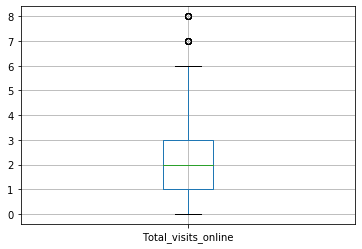

In [16]:
#Replacing outliers with mode value  
outliers_high['Total_visits_online']
df['Total_visits_online'].mode()[0]
df.loc[df['Total_visits_online']>outliers_high['Total_visits_online'],'Total_visits_online']=df['Total_visits_online'].mode()[0]
df.boxplot(['Total_visits_online'])

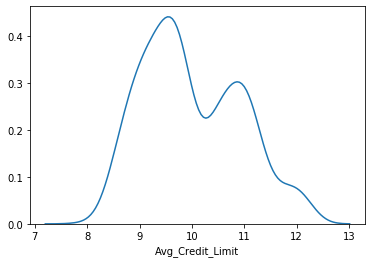

In [17]:
# log transformation to reduce skewness of Avg_Credit_Limit
sns.distplot(np.log(df['Avg_Credit_Limit']),hist=False)
plt.show()

In [18]:
df['Avg_Credit_Limit'] = np.log(df['Avg_Credit_Limit'])

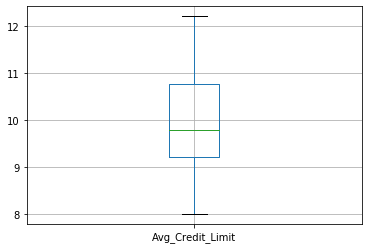

In [19]:
df.boxplot(['Avg_Credit_Limit'])

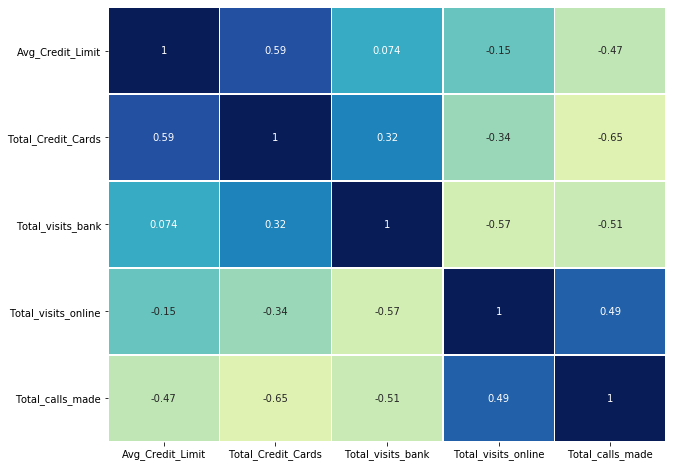

In [20]:
# Check Correlation Matrix
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

The highest correlation factors are found between the total number of credit cards and the average credit limit (positive correlation), the number of calls made and the number of credit cards (negative correlation), and between the number of visits at the bank with the visits online and numbers of call made (negative correlation)

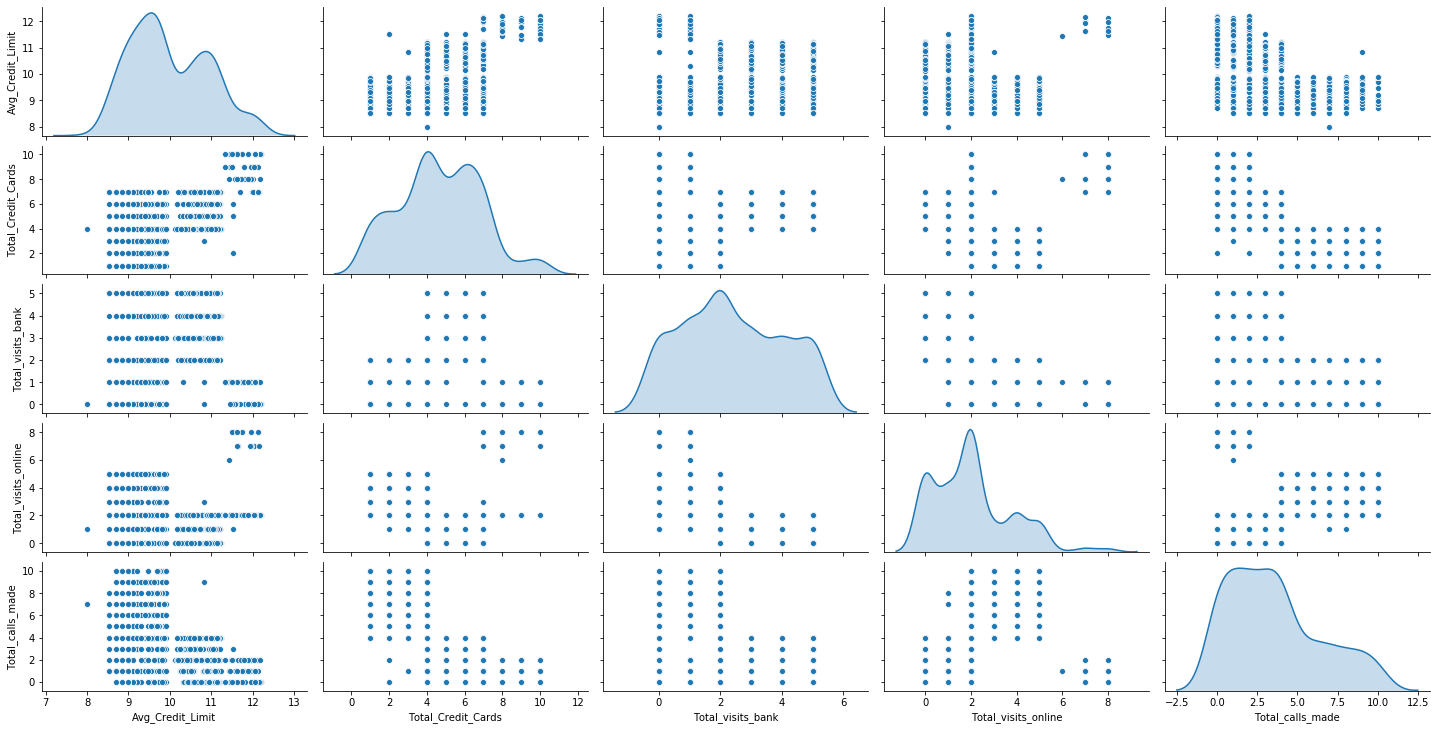

In [21]:
# plot kde and visualize relations between variables 
sns.pairplot(df, height=2,aspect=2 , diag_kind='kde')

# 2 -  Conclusions and Standardization

From EDA we can see a few groups emerging : 
- Average credit : 2 distinct groups observed : high and low average credit limit  
    - High avg credit limit when :
       - the total calls made is low
       - customers tend to visit more online than in the bank
       - customers own more credit cards 
- 3 clusters observed for the total number of credit cards
    - more calls made for customers owning less credit cards
    - the customer tend to visite less the bank whith more credit cards - the opoost os not true : more vists when the number of credit cards is less than 8 but more than 4. 
    
- 2 cluster obsreved for the total visits in bank :
     - customer tend to call more or to visit online when they are not visiting the bank 
     
- 2 or 3 clusters for the total visits online 
     - most of customers do not visit online
     - the ones who are not visiting online have low credit limit and lower number of credit cards (you visit more online with more credit cards)
     
- 2 clusters for the total number of calls made 
    - most of customers call between 1 and 4 times. Those customers visit more online, the bank , have more credit cards and higher credit limit 

Conclusions :  2 or 3 clusters look to be appropriate

In [22]:
#Standardize the data by using Z-score before going to any clustering method
from scipy.stats import zscore
df_z = df.apply(zscore)
df_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.630478,-1.249225,-0.860451,-0.609464,-1.251537
1,0.885387,-0.787585,-1.473731,-0.019660,1.891859
2,0.885387,1.058973,-0.860451,0.570144,0.145528
3,0.336281,0.135694,-0.860451,-0.609464,0.145528
4,1.630478,0.597334,-1.473731,-0.019660,-0.203739


The dataset is standardized 

# 3. Apply K-mean clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

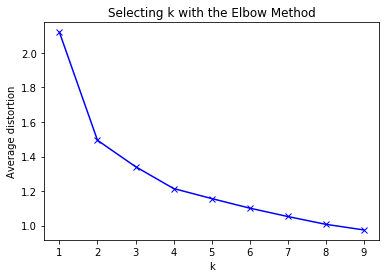

In [23]:
from sklearn.cluster import KMeans

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_z)
    prediction=model.predict(df_z)
    meanDistortions.append(sum(np.min(cdist(df_z, model.cluster_centers_, 'euclidean'), axis=1)) / df_z.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

The elbow method shows that k=3 is indeed a good number for the number of clusters

In [24]:
# Let's study the characteristics of each groups with boxplots

model_KMean=KMeans(n_clusters=3)
model_KMean.fit(df_z)
prediction_KMean=model_KMean.predict(df_z)
prediction_KMean

# Add cluster number to original data
df["group_KM"] = prediction_KMean
df['group_KM'] = df['group_KM'].astype('category')
df.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards        int64
Total_visits_bank         int64
Total_visits_online       int64
Total_calls_made          int64
group_KM               category
dtype: object

In [25]:
df.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group_KM
0,11.512925,2,1,1,0,0
1,10.819778,3,0,2,9,1
2,10.819778,7,1,3,4,2
3,10.308953,5,1,1,4,0
4,11.512925,6,0,2,3,2
5,9.903488,3,0,1,8,1
6,11.512925,5,0,2,2,2
7,9.615805,3,0,1,1,0
8,8.517193,2,0,2,2,1
9,8.006368,4,0,1,7,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1C7F6CF88>,
      dtype=object)

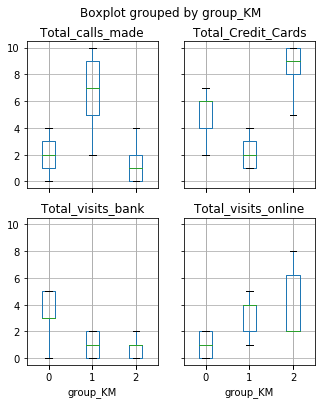

In [26]:
# Visualize the clusters
df.boxplot(['Total_calls_made','Total_Credit_Cards','Total_visits_bank','Total_visits_online'], by = 'group_KM',layout=(2,2),figsize=(5, 6))

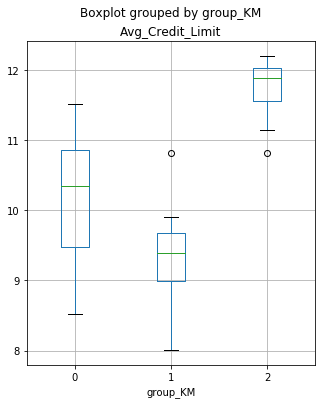

In [27]:
df.boxplot(['Avg_Credit_Limit'], by = 'group_KM',figsize=(5, 6))

Group 0 is characterised by medium credit limit, the highest number of visits to the bank, low visit online and reasonable number of credit cards and not so many calls made. 

Group 1 : lowest credit limit, medium visit online and in the bank, lots of call and low number of credit cards

Group 2 - High credit limit, visit online more often, do not visit bank, do not call,  lots of credit cards

# 4. Apply Hierarchical clustering

In [28]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  

## 4.1 Average Linkage

In [29]:
# use of 'average linkage' 
Z_aver = linkage(df_z, metric='euclidean', method='average')
c_aver, coph_dists_aver = cophenet(Z_aver , pdist(df_z))
print('The cophenet coefficient is',c_aver)

The cophenet coefficient is 0.821489939685142


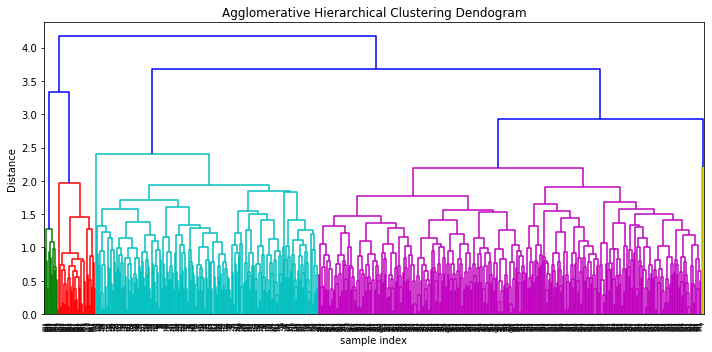

In [30]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_aver)
plt.tight_layout()

## 4.2 Single Linkage

In [31]:
# use of 'single linkage' 
Z_sing = linkage(df_z, metric='euclidean', method='single')
c_sing, coph_dists_sing = cophenet(Z_sing , pdist(df_z))
print('The cophenet coefficient is',c_sing)


The cophenet coefficient is 0.5189605385001946


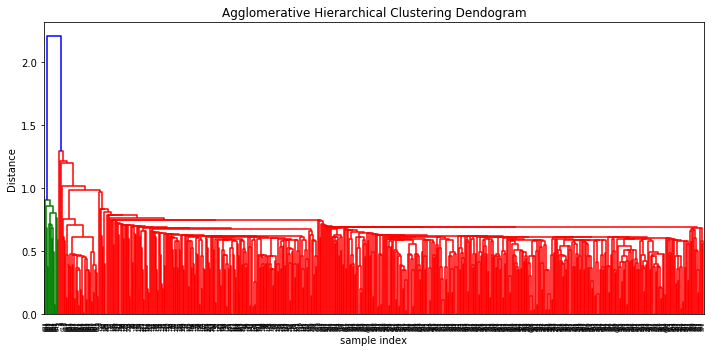

In [32]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_sing)
plt.tight_layout()

Using a single method is not good (uggly dendogram and lower cophenet coefficient compared to average method)

## 4.3  Complete Linkage

In [33]:
# use of 'complete linkage' 
Z_comp = linkage(df_z, metric='euclidean', method='complete')
c_comp, coph_dists_comp = cophenet(Z_comp , pdist(df_z))
print('The cophenet coefficient is',c_comp)


The cophenet coefficient is 0.6465569968568687


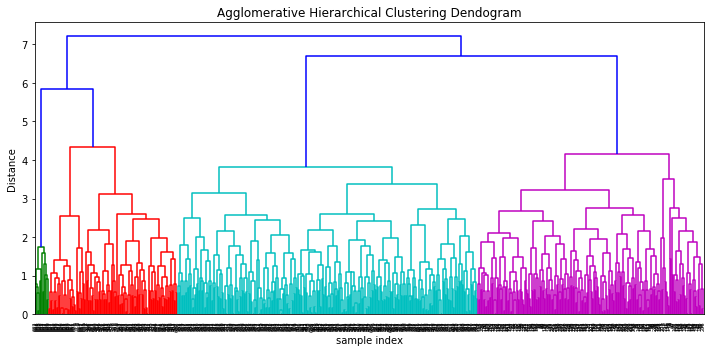

In [34]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_comp)
plt.tight_layout()

## 4.3  Ward Linkage

In [35]:
# use of 'ward linkage' 
Z_ward = linkage(df_z, metric='euclidean', method='ward')
c_ward, coph_dists_ward = cophenet(Z_ward , pdist(df_z))
print('The cophenet coefficient is',c_ward)


The cophenet coefficient is 0.7629984985640214


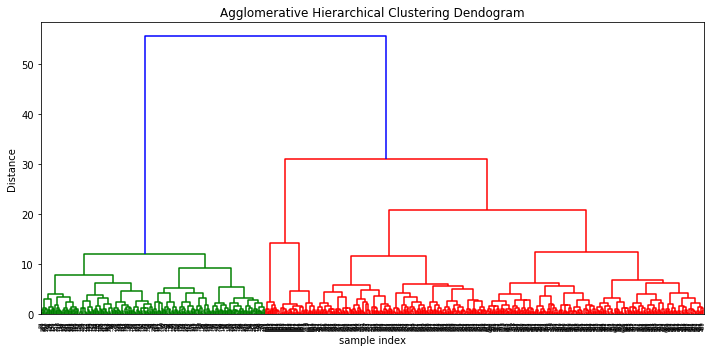

In [36]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_ward)
plt.tight_layout()

Conclusions : The average method for hierarchical clustering provides the best results. The cophenet coefficient of the average method is the closest from 1. Let's use this method for the next analysis.

## 4.4  Boxplots

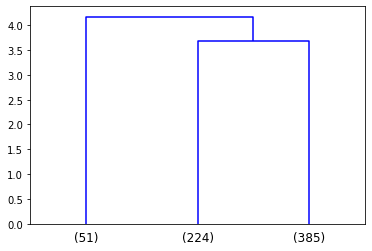

In [54]:
### Find the optimal distance between clusters from the truncated dendrogram
dendrogram(
    Z_aver,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [55]:
max_d = 3.5

In [56]:
# Use this distance measure(max_d) and fcluster function to cluster the data into 3 different groups
from scipy.cluster.hierarchy import fcluster
clusters_hier = fcluster(Z_aver, max_d, criterion='distance')
clusters_hier

array([3, 2, 1, 3, 1, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [57]:
# Add cluster number to the dataframe
df["group_Hier"] = clusters_hier
df['group_Hier'] = df['group_Hier'].astype('category')
df.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards        int64
Total_visits_bank         int64
Total_visits_online       int64
Total_calls_made          int64
group_KM                  int64
group_Hier             category
equal                      bool
dtype: object

In [58]:
df.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group_KM,group_Hier,equal
0,11.512925,2,1,1,0,0,3,False
1,10.819778,3,0,2,9,1,2,False
2,10.819778,7,1,3,4,2,1,True
3,10.308953,5,1,1,4,0,3,False
4,11.512925,6,0,2,3,2,1,True
5,9.903488,3,0,1,8,1,2,False
6,11.512925,5,0,2,2,2,1,True
7,9.615805,3,0,1,1,0,3,False
8,8.517193,2,0,2,2,1,2,False
9,8.006368,4,0,1,7,1,2,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1C8D23C08>,
      dtype=object)

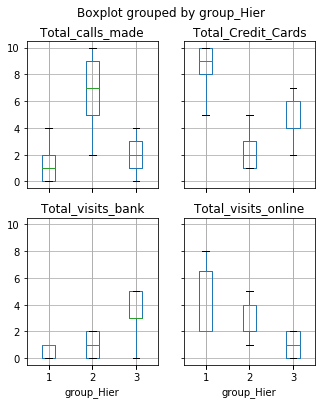

In [59]:
# Visualize the clusters 
df.boxplot(['Total_calls_made','Total_Credit_Cards','Total_visits_bank','Total_visits_online'], by = 'group_Hier',layout=(2,2),figsize=(5, 6))

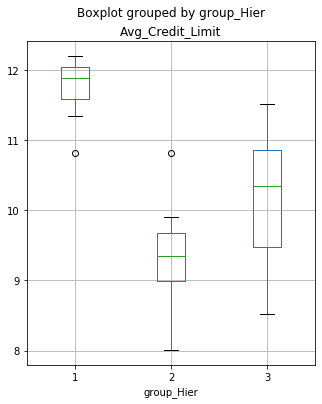

In [60]:
df.boxplot(['Avg_Credit_Limit'], by = 'group_Hier',figsize=(5, 6))

Group 1 is characterised by high credit limit, low visit to the bank, high visit online and highest number of credit cards , low number of credit cards. 

Group 2 : lowest credit limit, medium visit online and in the bank, lots of call and low number of credit cards

Group 3 - medium credit limit, low visit online , visit bank a lot ,  call moderatively, moderate number of credit cards

# 5. Calculate average silhouette score for both methods

In [61]:
from sklearn.metrics import silhouette_score

# Calculate Avg Silhoutte Score for hierachical cluster
print('The average Silhoutte Score for hierachical cluster is ',silhouette_score(df_z,clusters_hier))

The average Silhoutte Score for hierachical cluster is  0.46076094602128215


In [62]:
# Calculate Avg Silhoutte Score for K-Means cluster
print('The average Silhoutte Score for K-Means cluster is ',silhouette_score(df_z,prediction))

The average Silhoutte Score for K-Means cluster is  0.23740217328646282


The silhouette score for the hierarchical cluster is better than for K-Means. 

# 6. Compare K-Means clusters with Hierarchical clusters

In [63]:
df.head()
#convert groups columns to integer to be able to compare the cluster
df['group_Hier'] = df['group_Hier'].astype('int64')
df['group_KM'] = df['group_KM'].astype('int64')

# as the three groups formed based on the credit limit looks consitent betwwen both clustering methods,let's swap the group number for comparaisons 
# add 1 to group_KM to be consitent with Group_Hier index
df["group_KM"]=df["group_KM"]+1

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group_KM,group_Hier,equal
0,11.512925,2,1,1,0,1,3,False
1,10.819778,3,0,2,9,2,2,True
2,10.819778,7,1,3,4,3,1,False
3,10.308953,5,1,1,4,1,3,False
4,11.512925,6,0,2,3,3,1,False
5,9.903488,3,0,1,8,2,2,True
6,11.512925,5,0,2,2,3,1,False
7,9.615805,3,0,1,1,1,3,False
8,8.517193,2,0,2,2,2,2,True
9,8.006368,4,0,1,7,2,2,True


In [65]:
#swap group 1 to 3 and group 3 to 1
df['group_KM'] = df['group_KM'].replace([1,3],[3,1])

In [66]:
#compare both clusters columns
comparison_column = np.where(df["group_KM"] == df["group_Hier"], True, False)
df["equal"] = comparison_column
df.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group_KM,group_Hier,equal
0,11.512925,2,1,1,0,3,3,True
1,10.819778,3,0,2,9,2,2,True
2,10.819778,7,1,3,4,1,1,True
3,10.308953,5,1,1,4,3,3,True
4,11.512925,6,0,2,3,1,1,True
5,9.903488,3,0,1,8,2,2,True
6,11.512925,5,0,2,2,1,1,True
7,9.615805,3,0,1,1,3,3,True
8,8.517193,2,0,2,2,2,2,True
9,8.006368,4,0,1,7,2,2,True


In [67]:
df['equal'].value_counts(normalize=True)

True     0.99697
False    0.00303
Name: equal, dtype: float64

ALmost 100% of the comparison between both clusters is true.

# 7. Conclusions

1. Three different segments of customers can be observed. 

2. We notice that  those with high credit limit do not low visit to the bank but vist more  online. THey own moderate number of credits cards. THoe who visit the bank a lot have also called a lot . THey may be disapointed. They also have low credit limit.   
3. we can recommend to the bank to improve theri online service to minimize the number of visist at the bank and make a more agile process. THey should also limit the number of credit cards max the client can have but increase the credit limit. 